### Exercise-4 
### Python Program for Random Forest Regression (Manual).

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from collections import Counter

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

# Input: Dataset 
data = pd.read_csv('rfgregress.csv')

# Separating Dependent and Independent Variables
X = data.iloc[:,0:1].values  
Y = data.iloc[:, 1].values   

# Splitting the data into training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4) 

# Sorting the Test Dataset for Better Visualization of Plot 
X_test_sort = (X_test)[1:-1].ravel()          
X_test_sort = X_test_sort.tolist()
Y_test_sort = Y_test.tolist()
mat = [[0]*2 for i in range(len(X_test_sort))]
k=0
# Zipping both X and Y values to sort them together
for i, j in zip(X_test_sort, Y_test_sort): 
    mat[k][0]=i
    mat[k][1]=j
    k = k+1
mats = sorted(mat)               # Sort the Zipped Matrix
X_tsort=[]
Y_tsort=[]
for i in range(len(mats)):       # Separating the X and Y values for Prediction
    X_tsort.append(mats[i][0])
    Y_tsort.append(mats[i][1])
X_tsort=np.array(X_tsort).reshape(-1,1)

# Create Random Forest Regressor object 
clf = RandomForest(n_trees = 100, max_depth = 10)

# Train the model using the training sets
clf.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_tsort)

### Exercise-4 
### Python Program for Random Forest Regression (SciKit-Learn).

In [35]:
# Create Random Forest Regressor object 
rfg = RandomForestRegressor(n_estimators = 1000) 

# Train the model using the training sets
rfg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = rfg.predict(X_tsort)  

### Exercise-4 
### Output and Comparison of Both Methods.



FOR RANDOM FOREST REGRESSION USING MANUAL METHOD

Mean Absolute Error: 17.98

Root Mean Squared Error: 22.65


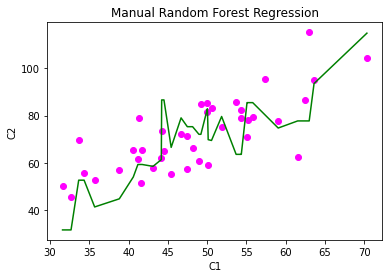

__________________________________________________________________


FOR RANDOM FOREST REGRESSION USING SCIKIT-LEARN METHOD

Mean Absolute Error: 16.50

Root Mean Squared Error: 20.27


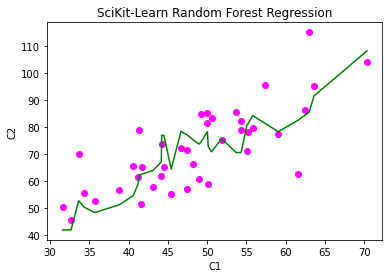

In [39]:
# For Manual Method
# Output: The Regression Line Plot, Mean Absolute Error and RMSE
print("\n\nFOR RANDOM FOREST REGRESSION USING MANUAL METHOD")
print('\nMean Absolute Error: %.2f' % mean_absolute_error(Y_tsort, y_pred))
print('\nRoot Mean Squared Error: %.2f' % mean_squared_error(Y_tsort, y_pred,
                                                             squared = False))
plt.plot(X_tsort, y_pred, color = 'green')  
plt.scatter(X_test, Y_test, color = 'magenta')   
plt.title('Manual Random Forest Regression') 
plt.xlabel('C1') 
plt.ylabel('C2') 
plt.show()

# For SciKit-Learn Method
# Output: The Regression Line Plot, Mean Absolute Error and RMSE
print("__________________________________________________________________\n")
print("\nFOR RANDOM FOREST REGRESSION USING SCIKIT-LEARN METHOD")
print('\nMean Absolute Error: %.2f' % mean_absolute_error(Y_tsort, Y_pred))
print('\nRoot Mean Squared Error: %.2f' % mean_squared_error(Y_tsort, Y_pred,
                                                             squared = False))
plt.plot(X_tsort, Y_pred, color = 'green') 
plt.scatter(X_test, Y_test, color = 'magenta')   
plt.title('SciKit-Learn Random Forest Regression') 
plt.xlabel('C1') 
plt.ylabel('C2') 
plt.show()

##### On Comparison of both methods, we can see that the Random Forest Regression model using SciKit-Learn Method is more accurate as compared to the Random Forest Regression Model using Manual Method.